In [21]:
# importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Imorting Data
df = pd.read_excel('Retail_dataset.xlsx')

In [23]:
# Creating DataFrames 
orders = pd.read_excel (r'Retail_dataset.xlsx', sheet_name='orders')
orders_items = pd.read_excel ('Retail_dataset.xlsx', sheet_name='order_items')
customers = pd.read_excel ('Retail_dataset.xlsx', sheet_name='customers')
payments = pd.read_excel ('Retail_dataset.xlsx', sheet_name='payments')
products = pd.read_excel ('Retail_dataset.xlsx', sheet_name='products')

#### Checking data

In [24]:
orders = orders[orders.order_status=="delivered"]

In [25]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [39]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [27]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [28]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


# Checking Orders 


In [30]:
orders.order_status.unique()

array(['delivered'], dtype=object)

In [31]:
orders["order_id"].duplicated().sum()

0

In [32]:
orders.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

In [33]:
orders.isnull().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [34]:
orders.order_approved_at.fillna(orders.order_purchase_timestamp,inplace=True)

In [35]:
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [36]:
orders.isnull().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

# Checking Order_items

In [40]:
orders_items.isnull().sum().sort_values(ascending=False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [41]:
orders_items["order_id"].duplicated().sum()

13984

# Checking customers

In [42]:
customers.isnull().sum().sort_values(ascending=False)

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [43]:
customers.customer_id.duplicated().sum()
# we only want unique customers

3345

In [44]:
customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [45]:
customers.customer_id.duplicated().sum()

0

# Checking payments

In [46]:
payments.isnull().sum().sort_values(ascending=False)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

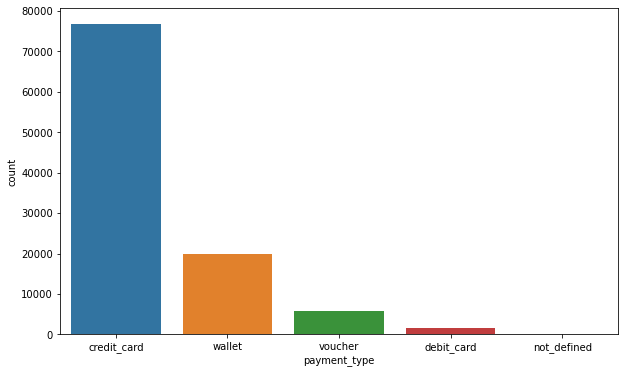

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=payments, x=payments['payment_type'])
plt.show()

In [49]:
# removing not_defined because it is not needed
payments[payments['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [50]:
payments.payment_type.unique()

array(['credit_card', 'wallet', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [51]:
not_d = payments[payments.payment_type=='not_defined'].index

In [52]:
not_d

Int64Index([51280, 57411, 94427], dtype='int64')

In [53]:
payments.drop(not_d,axis=0,inplace=True)

In [54]:
payments.payment_type.unique()

array(['credit_card', 'wallet', 'voucher', 'debit_card'], dtype=object)

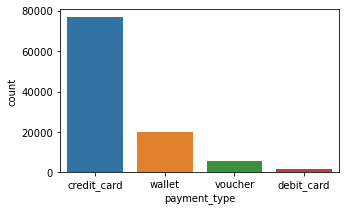

In [55]:
plt.figure(figsize=(5,3))
sns.countplot(data=payments, x=payments['payment_type'])
plt.show()

# Checking products

In [56]:
products.isnull().sum().sort_values(ascending=False)


product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [57]:
products["product_category_name"].mode()

0    toys
dtype: object

In [58]:
products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace=True)

In [59]:
products.isnull().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

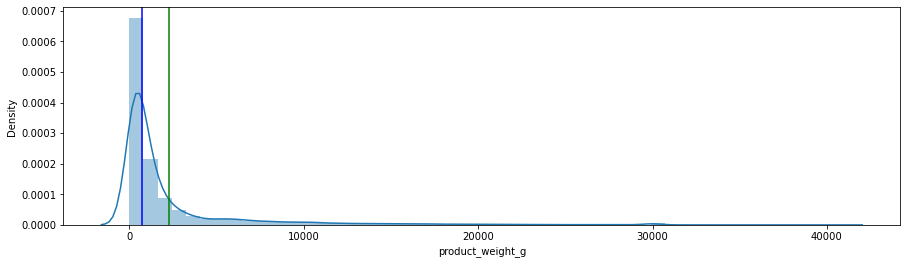

In [60]:
plt.figure(figsize=(15,4))
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="green")
plt.axvline(products.product_weight_g.median(), color="Blue")
plt.show()

In [ ]:
# can use median to fill the null values

In [61]:
# used Median to impute all other columns as well
products.product_weight_g.fillna(products.product_weight_g.median(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace=True)

In [62]:
products.isnull().sum().sort_values(ascending=False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [ ]:
# Merging DataFrame into a single Dataframe

In [64]:
Delivered_order = pd.merge(orders,orders_items,how='inner',on='order_id')

In [65]:
Delivered_order.shape

(110197, 12)

In [66]:
Delivered_order = pd.merge(Delivered_order,customers,how='inner',on='customer_id')

In [67]:
Delivered_order.shape

(110197, 15)

In [68]:
Delivered_order = pd.merge(Delivered_order,products,how='inner',on='product_id')

In [69]:
Delivered_order.shape

(110197, 20)

In [70]:
Delivered_order = pd.merge(Delivered_order,payments,how='inner',on='order_id')

In [71]:
Delivered_order.shape

(115035, 24)

In [72]:
Delivered_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,customer_state,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,housewares,500.0,19.0,8.0,13.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,housewares,500.0,19.0,8.0,13.0,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,housewares,500.0,19.0,8.0,13.0,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,housewares,500.0,19.0,8.0,13.0,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,housewares,500.0,19.0,8.0,13.0,1,credit_card,1,37.77


In [73]:
# checking for null values
Delivered_order.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

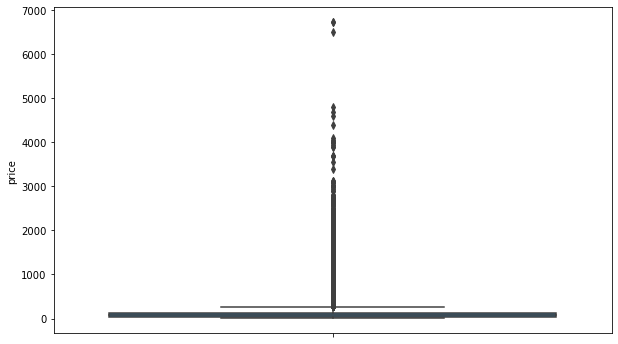

In [74]:
#Checking for outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=Delivered_order, y=Delivered_order['price'])
plt.show()

In [75]:
Delivered_order[Delivered_order['price']>5000].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,customer_state,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
41952,f5136e38d1a14a4dbd87dff67da82701,ff4159b92c40ebe40454e3e6a7c35ed6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-06-05 17:09:48,2017-06-28,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,...,SP,toys,7400.0,47.0,25.0,25.0,1,wallet,1,6726.66
82306,0812eb902a67711a1cb742b3cdaa65ae,dc4802a71eae9be1dd28f5d788ceb526,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-03-03 14:23:18,2017-03-09,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,...,MS,housewares,30000.0,60.0,61.0,33.0,1,credit_card,8,6929.31
88002,fefacc66af859508bf1a7934eab1e97f,459bef486812aa25204be022145caa62,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-15 14:57:50,2018-08-10,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,...,ES,toys,5660.0,54.0,18.0,47.0,1,wallet,1,6922.21


In [76]:
Delivered_order[Delivered_order['price']>4000].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,customer_state,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
37421,b239ca7cd485940b31882363b52e6674,ca27f3dac28fb1063faddd424c9d95fa,delivered,2018-07-29 08:39:48,2018-07-30 08:15:14,2018-07-31 23:03:28,2018-08-07,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,...,MG,toys,8000.0,55.0,25.0,45.0,1,debit_card,1,4163.51
41952,f5136e38d1a14a4dbd87dff67da82701,ff4159b92c40ebe40454e3e6a7c35ed6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-06-05 17:09:48,2017-06-28,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,...,SP,toys,7400.0,47.0,25.0,25.0,1,wallet,1,6726.66
67640,426a9742b533fc6fed17d1fd6d143d7e,edde2314c6c30e864a128ac95d6b2112,delivered,2018-08-03 21:10:16,2018-08-06 14:24:28,2018-08-08 22:51:57,2018-08-20,1,a1beef8f3992dbd4cd8726796aa69c53,512d298ac2a96d1931b6bd30aa21f61d,...,SP,toys,3550.0,71.0,34.0,22.0,1,credit_card,10,4513.32
79279,68101694e5c5dc7330c91e1bbc36214f,fa562ef24d41361e476e748681810e1e,delivered,2018-03-29 10:31:29,2018-03-31 08:27:27,2018-04-06 22:35:30,2018-04-17,1,6cdf8fc1d741c76586d8b6b15e9eef30,ed4acab38528488b65a9a9c603ff024a,...,MG,toys,3050.0,34.0,10.0,22.0,1,credit_card,10,4175.26
82306,0812eb902a67711a1cb742b3cdaa65ae,dc4802a71eae9be1dd28f5d788ceb526,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-03-03 14:23:18,2017-03-09,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,...,MS,housewares,30000.0,60.0,61.0,33.0,1,credit_card,8,6929.31


In [77]:
Delivered_order[Delivered_order['price']>3000].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,customer_state,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
37421,b239ca7cd485940b31882363b52e6674,ca27f3dac28fb1063faddd424c9d95fa,delivered,2018-07-29 08:39:48,2018-07-30 08:15:14,2018-07-31 23:03:28,2018-08-07,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,...,MG,toys,8000.0,55.0,25.0,45.0,1,debit_card,1,4163.51
37422,a53e05ecd2ed1f46a2b8e1f5828be7c6,bc5e25094a7d51b6aee35236572e64f4,delivered,2018-01-26 14:30:21,2018-01-27 14:35:51,2018-02-02 13:53:10,2018-02-15,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,...,MG,toys,8000.0,55.0,25.0,45.0,1,credit_card,10,3826.80
37602,3a4b013e014723cc38c9faa8ffdc6387,2c3b08cf3584d8c0a81d9618a73aa219,delivered,2018-04-09 11:32:37,2018-04-10 07:35:20,2018-04-13 02:06:43,2018-04-24,1,34f99d82cfc355d08d8db780d14aa002,a00824eb9093d40e589b940ec45c4eb0,...,SP,toys,25950.0,39.0,95.0,42.0,1,credit_card,8,3526.46
41952,f5136e38d1a14a4dbd87dff67da82701,ff4159b92c40ebe40454e3e6a7c35ed6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-06-05 17:09:48,2017-06-28,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,...,SP,toys,7400.0,47.0,25.0,25.0,1,wallet,1,6726.66
42412,1d54db601b417ccdfd3b7071955e6cc7,bbeb907759ef5fc169099af3c88d535d,delivered,2018-04-27 05:57:39,2018-04-28 10:29:50,2018-05-03 23:52:04,2018-05-15,1,6e729bd456c54469a9af4c8774f1eab7,039e6ad9dae79614493083e241147386,...,SC,garden_tools,6050.0,18.0,39.0,31.0,1,credit_card,5,3209.72


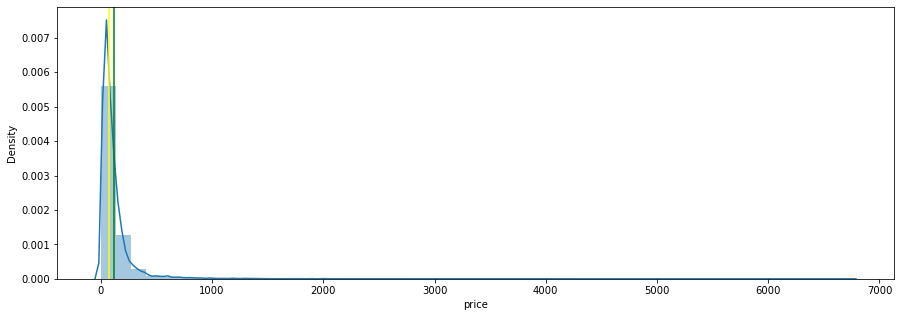

In [78]:
plt.figure(figsize=(15,5))
sns.distplot(Delivered_order.price)
plt.axvline(Delivered_order.price.mean(), color="green")
plt.axvline(Delivered_order.price.median(), color="yellow")
plt.show()

In [79]:
Delivered_order.loc[(Delivered_order['price']>3000), 'price']=Delivered_order['price'].median()

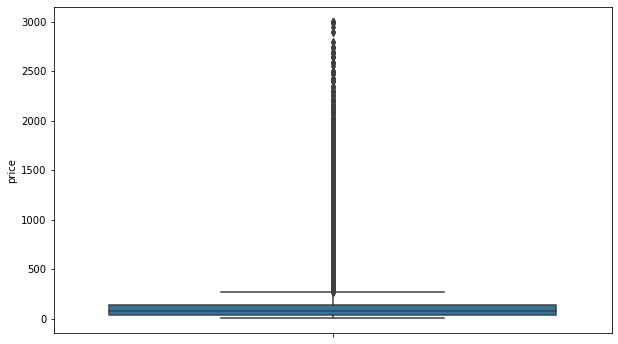

In [80]:
#Checking for outliers


plt.figure(figsize=(10,6))
sns.boxplot(data=Delivered_order, y=Delivered_order['price'])
plt.show()

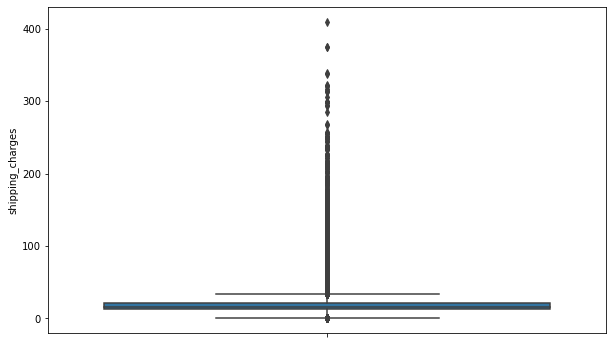

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(data=Delivered_order, y=Delivered_order['shipping_charges'])
plt.show()

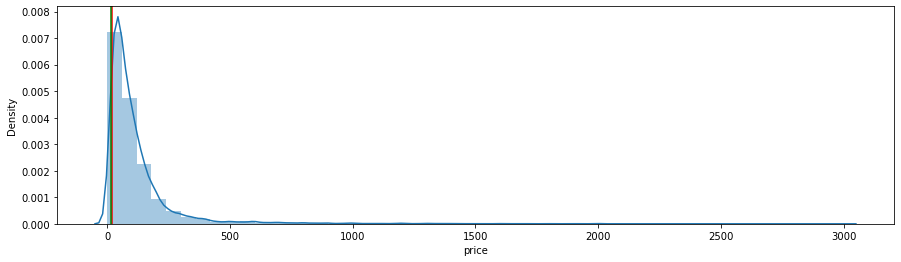

In [82]:
plt.figure(figsize=(15,4))
sns.distplot(Delivered_order.price)
plt.axvline(Delivered_order.shipping_charges.mean(), color="red")
plt.axvline(Delivered_order.shipping_charges.median(), color="green")
plt.show()

In [83]:
Delivered_order.loc[Delivered_order['shipping_charges']>70, 'shipping_charges'] = Delivered_order['shipping_charges'].median()

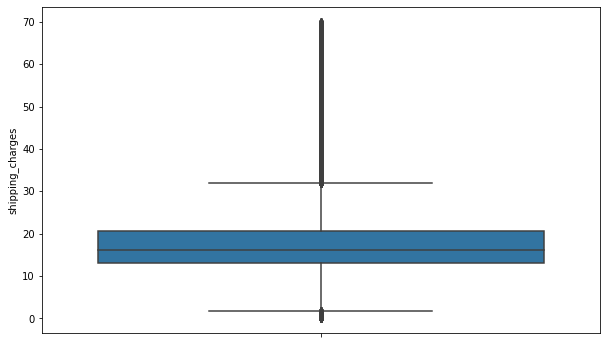

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(data=Delivered_order, y=Delivered_order['shipping_charges'])
plt.show()

In [ ]:
# Exporting the clean data to an excel file

writer = pd.ExcelWriter('Reatail_cleaned.xlsx', engine='xlsxwriter')
Delivered_order.to_excel(writer, sheet_name='Sheet1')
writer.save()

# Market Basket Analysis

In [ ]:
#Installing the package
!pip install mlxtend

In [85]:
#Importing libraries 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [86]:
#selecting the data required
Apriori_dataset = Delivered_order[['order_id','product_category_name', 'order_item_id']]

In [87]:
Apriori_dataset.drop_duplicates(keep='first', inplace=True)

In [88]:
# encoding the Data to 1s and 0s
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

In [93]:
pivot_df = pd.pivot_table(data=Apriori_dataset,index='order_id',columns='product_category_name',
                              values='order_item_id',fill_value=0)

In [94]:
#encoding
Apriori_dataset_encode=pivot_df.applymap(encode)

In [124]:
#select only those orders with more than 1 item ordered
Apriori_dataset_encode = Apriori_dataset_encode[(Apriori_dataset_encode>0).sum(axis=1)>=2]

#### Building the models and analyzing the results

In [126]:
frq_items = apriori(Apriori_dataset_encode, min_support = 0.05, use_colnames = True)
frq_items

,support,itemsets
0,0.230350,(bed_bath_table)
1,0.084047,(computers_accessories)
2,0.126848,(furniture_decor)
3,0.066148,(health_beauty)
4,0.053696,(housewares)
5,0.055253,(sports_leisure)
6,0.971206,(toys)
7,0.058366,(watches_gifts)
8,0.226459,"(toys, bed_bath_table)"
9,0.080156,"(toys, computers_accessories)"


In [127]:
rules_confidence = association_rules(frq_items, metric="confidence", min_threshold=0.01)
rules_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toys),(bed_bath_table),0.971206,0.230350,0.226459,0.233173,1.012255,0.002742,1.003681
1,(bed_bath_table),(toys),0.230350,0.971206,0.226459,0.983108,1.012255,0.002742,1.704591
2,(toys),(computers_accessories),0.971206,0.084047,0.080156,0.082532,0.981979,-0.001471,0.998349
3,(computers_accessories),(toys),0.084047,0.971206,0.080156,0.953704,0.981979,-0.001471,0.621946
4,(toys),(furniture_decor),0.971206,0.126848,0.119066,0.122596,0.966479,-0.004130,0.995154
5,(furniture_decor),(toys),0.126848,0.971206,0.119066,0.938650,0.966479,-0.004130,0.469339
6,(toys),(health_beauty),0.971206,0.066148,0.063035,0.064904,0.981193,-0.001208,0.998670
7,(health_beauty),(toys),0.066148,0.971206,0.063035,0.952941,0.981193,-0.001208,0.611868
8,(toys),(watches_gifts),0.971206,0.058366,0.056809,0.058494,1.002190,0.000124,1.000136
9,(watches_gifts),(toys),0.058366,0.971206,0.056809,0.973333,1.002190,0.000124,1.079767


In [128]:
rules_lift=rules_confidence[(rules_confidence['lift'] > 1)]
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toys),(bed_bath_table),0.971206,0.230350,0.226459,0.233173,1.012255,0.002742,1.003681
1,(bed_bath_table),(toys),0.230350,0.971206,0.226459,0.983108,1.012255,0.002742,1.704591
8,(toys),(watches_gifts),0.971206,0.058366,0.056809,0.058494,1.002190,0.000124,1.000136
9,(watches_gifts),(toys),0.058366,0.971206,0.056809,0.973333,1.002190,0.000124,1.079767


In [131]:
frq_items["itemsets"] = frq_items["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_confidence["antecedents"] = rules_confidence["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_confidence["consequents"] = rules_confidence["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_lift["antecedents"] = rules_lift["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_lift["consequents"] = rules_lift["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [132]:
# Exporting to excel for visualizing

writer1 = pd.ExcelWriter('Apriori.xlsx', engine='xlsxwriter')
frq_items.to_excel(writer1, sheet_name="support", index=False)
rules_confidence.to_excel(writer1, sheet_name="confidence", index=False)
rules_lift.to_excel(writer1, sheet_name="lift", index=False)
writer1.save()